In [1]:
import pandas as pd

In [2]:
pd.DataFrame

pandas.core.frame.DataFrame

In [3]:
!ls

Lesson.ipynb  Lesson-Solutions.ipynb  matplotlib  train.csv


In [4]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
print(df['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [6]:
print(df['Survived'].mean())

0.3838383838383838


In [7]:
print(df['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [8]:
print(df.groupby('Pclass')['Fare'].mean())

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64


In [9]:
print(df['Age'].mean())

29.69911764705882


In [10]:
print(df['Pclass'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [11]:
print(df['Age'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [12]:
print(df['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


In [13]:
bins = [0, 18, 30, 40, 50, 60, 70, 80]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_distribution = df['AgeGroup'].value_counts().sort_index()

print(age_distribution)

AgeGroup
0-18     113
19-30    271
31-40    167
41-50     89
51-60     48
61-70     19
71-80      6
Name: count, dtype: int64


# Matplotlib

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Text(0.5, 1.0, 'Passenger Age Distribution')

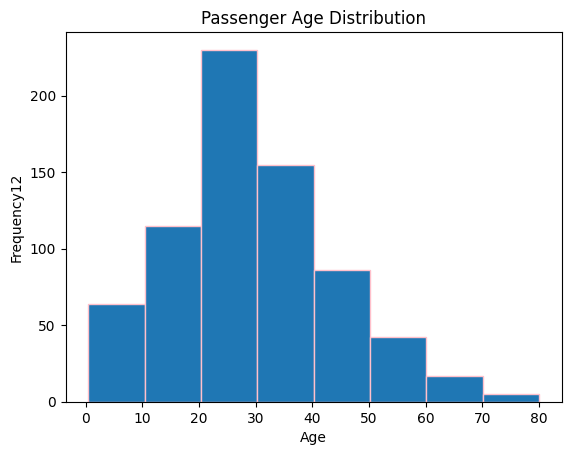

In [74]:
df['Age'].plot.hist(bins=8, edgecolor='pink')
plt.xlabel('Age')
plt.ylabel('Frequency12')
plt.title('Passenger Age Distribution')
# plt.show()

## What Kind of Plot Fits What Kind of Data?

Line Plot: Use a line plot to show trends or patterns over time or a continuous interval (such as time)

In [61]:
plt.plot?

Text(0.5, 1.0, 'Plant Growth Over Time')

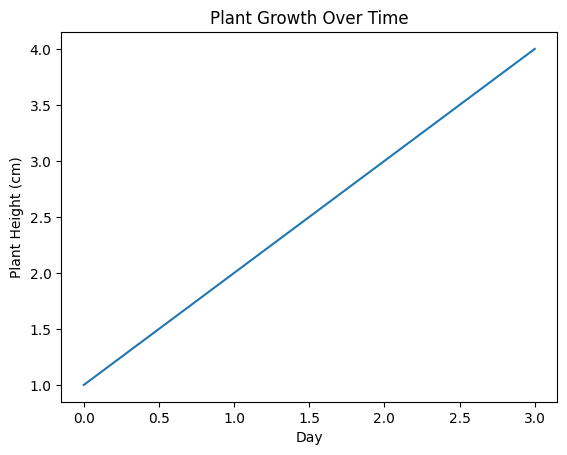

In [64]:
data = {'Day': [1, 2, 3, 4], 'Plant Height (cm)': [2, 4, 7, 11]}
df = pd.DataFrame(data)

plt.plot(df['Day'])
plt.xlabel('Day')
plt.ylabel('Plant Height (cm)')
plt.title('Plant Growth Over Time')
# plt.show()

Bar Plot: Use a bar plot to compare different categories or groups.

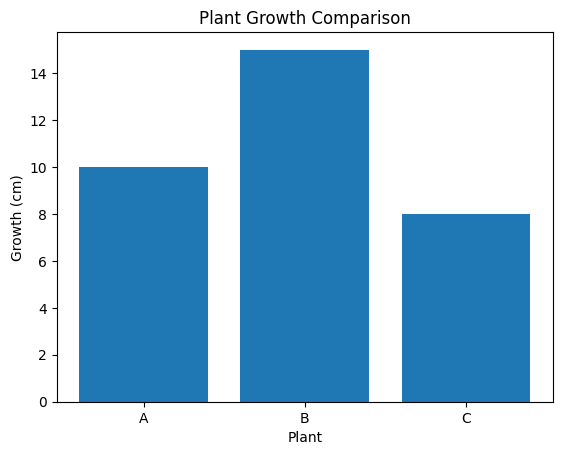

In [17]:
data = {'Plant': ['A', 'B', 'C'], 'Growth (cm)': [10, 15, 8]}
df = pd.DataFrame(data)

plt.bar(df['Plant'], df['Growth (cm)'])
plt.xlabel('Plant')
plt.ylabel('Growth (cm)')
plt.title('Plant Growth Comparison')
plt.show()

Histogram: Use a histogram to visualize the distribution of a single variable.

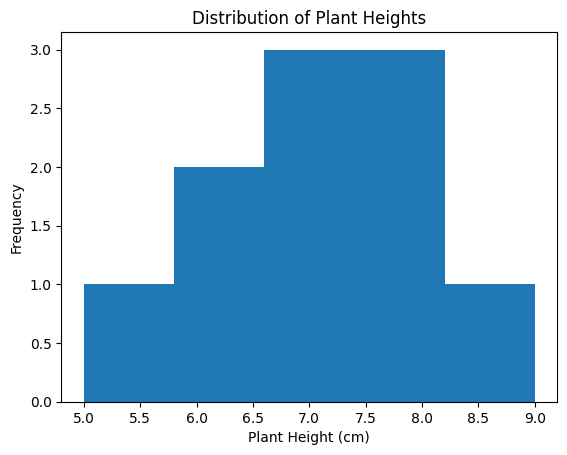

In [18]:
data = {'Plant Height (cm)': [5, 6, 6, 7, 7, 7, 8, 8, 8, 9]}
df = pd.DataFrame(data)

plt.hist(df['Plant Height (cm)'], bins=5)
plt.xlabel('Plant Height (cm)')
plt.ylabel('Frequency')
plt.title('Distribution of Plant Heights')
plt.show()

Box Plot: Use a box plot to show the distribution of a numerical variable across different categories or groups.

The black lines present min and max values and the inner orange line is the median

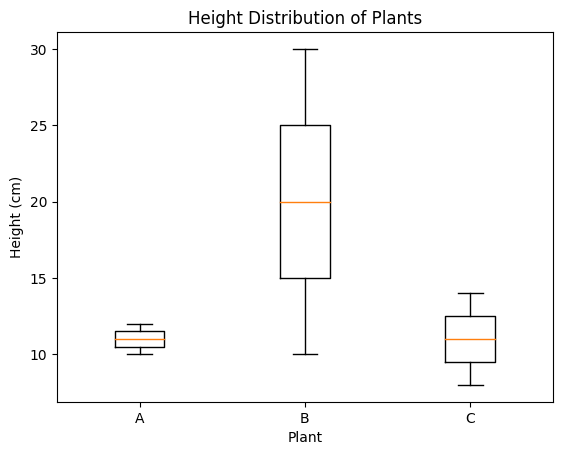

In [77]:
data = {'Plant': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
        'Height (cm)': [10, 12, 10, 20, 30, 8, 10, 12, 14]}
df = pd.DataFrame(data)

plt.boxplot([df[df['Plant'] == 'A']['Height (cm)'],
             df[df['Plant'] == 'B']['Height (cm)'],
             df[df['Plant'] == 'C']['Height (cm)']],
            labels=['A', 'B', 'C'])
plt.xlabel('Plant')
plt.ylabel('Height (cm)')
plt.title('Height Distribution of Plants')
plt.show()

Pie Chart: Use a pie chart to show the composition of a categorical variable.

In [ ]:
plt.pie(labels)

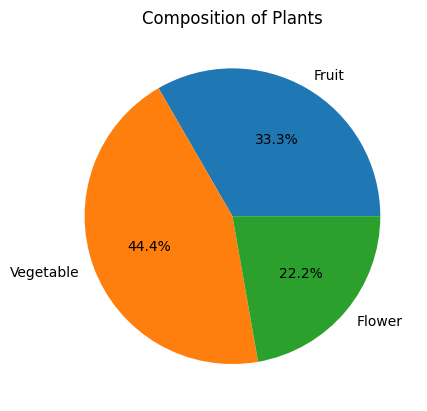

In [88]:
data = {'Category': ['Fruit', 'Vegetable', 'Flower'],
        'Count': [30, 40, 20]}
df = pd.DataFrame(data)

plt.pie(df['Count'], labels=df['Category'], autopct='%1.1f%%')
plt.title('Composition of Plants')
plt.show()

Scatter Plot: Use a scatter plot to visualize the relationship between two numerical variables.

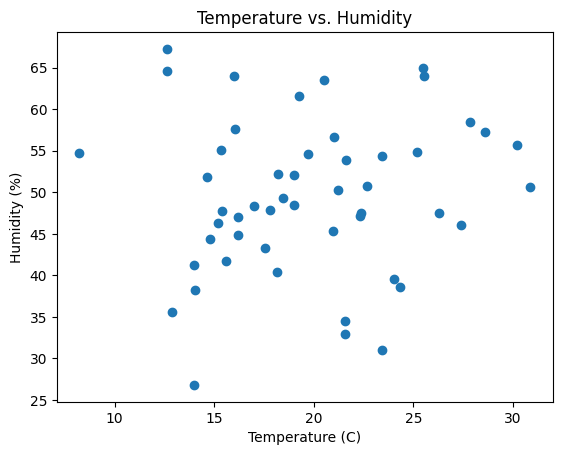

In [90]:
data = {'Temperature (C)': np.random.normal(20, 5, 50),
        'Humidity (%)': np.random.normal(50, 10, 50)}
df = pd.DataFrame(data)

plt.scatter(df['Temperature (C)'], df['Humidity (%)'])
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity (%)')
plt.title('Temperature vs. Humidity')
plt.show()

## How to Plot Stuff

[]

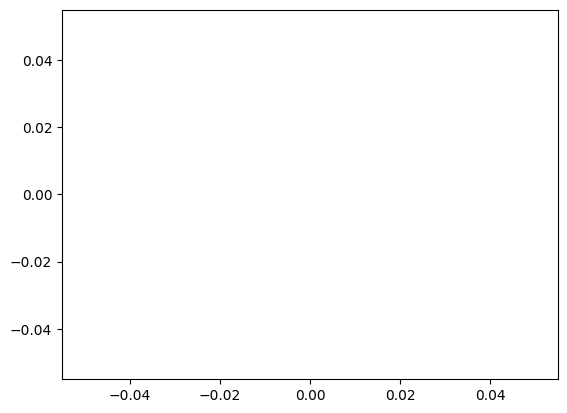

In [21]:
plt.plot()

In [95]:
plt.plot?

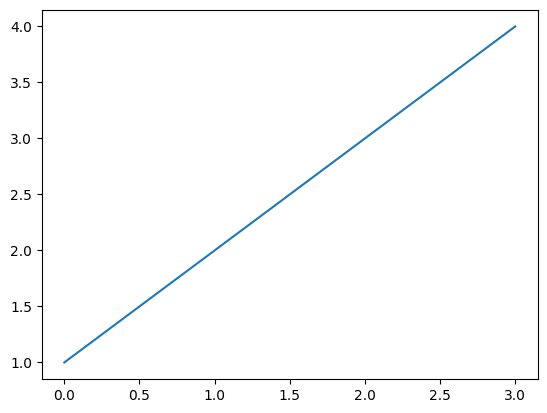

In [96]:
plt.plot([1,2,3,4])

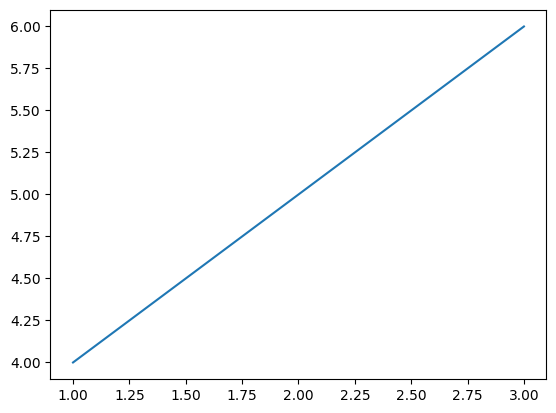

In [97]:
plt.plot([1,2,3], [4,5,6])

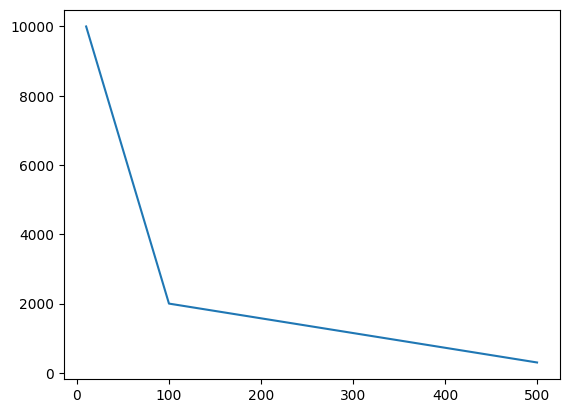

In [25]:
whiskey_bottles_prices = [10000, 2000, 300]
distance_from_tel_aviv = [10, 100, 500]

plt.plot(distance_from_tel_aviv, whiskey_bottles_prices)

### Exercise 1

Plot some data. Anything you like. Either create two lists of your own, or just you use some chat for that. Make sure to choose the correct kind of plot according to the kinds of plots above.

## Multiple Plots 

A figure is everything we see together, its a canvas, a blank page. 
Axes is the entire grpah with everything it has, axis, data, plot, ticks, evertyhing. 
One figure could have 3 different graphs, each one will be an axes.

In [98]:
import numpy as np
nums = np.arange(5)
nums * nums

array([ 0,  1,  4,  9, 16])

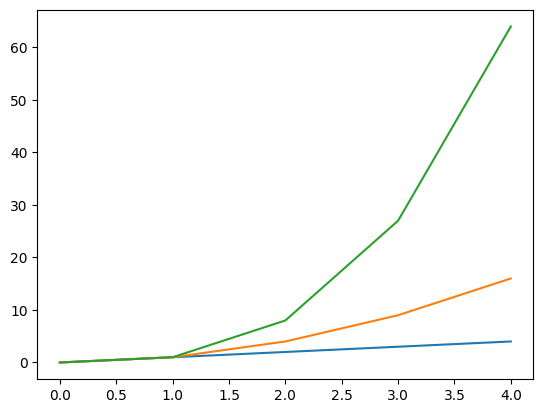

In [114]:
plt.plot(nums, nums)
plt.plot(nums, nums*nums)
plt.plot(nums, nums**3)

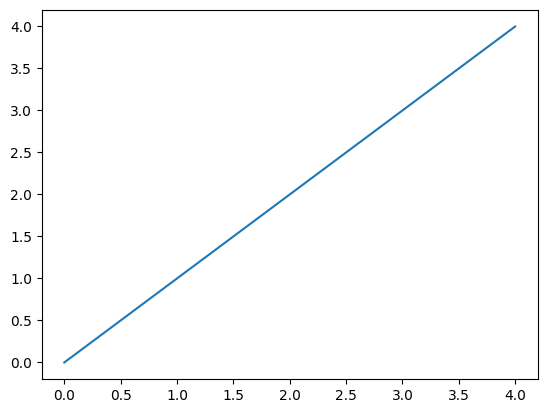

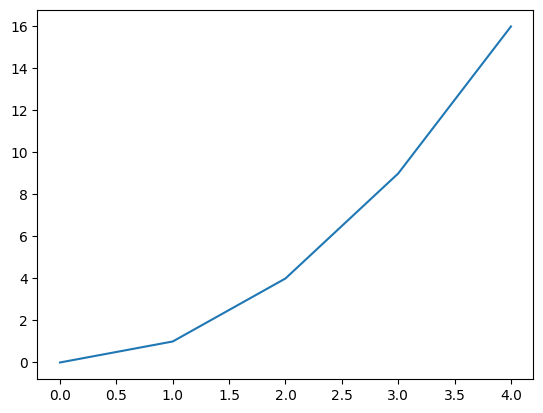

In [118]:
plt.figure()
plt.plot(nums, nums)

plt.figure()
plt.plot(nums, nums*nums)

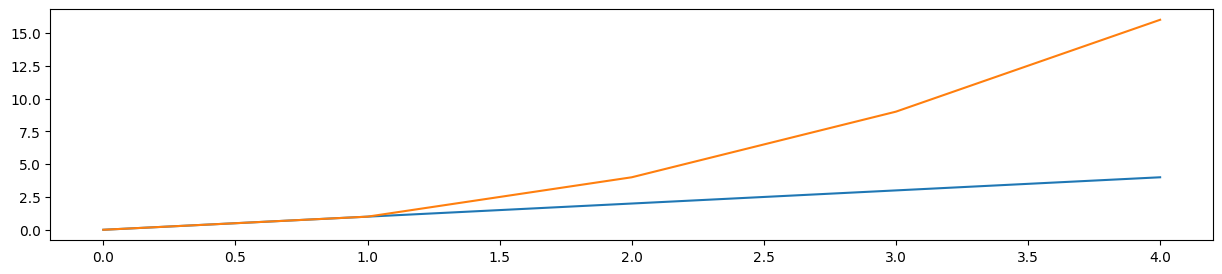

In [119]:
plt.figure(figsize=(15,3))
plt.plot(nums, nums)
plt.plot(nums, nums**2)

In [120]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [122]:
plt.style.use('fivethirtyeight')

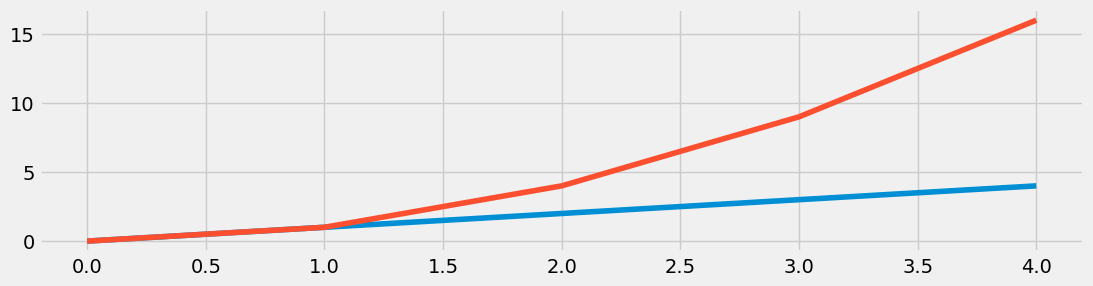

In [124]:
plt.figure(figsize=(12,3))
plt.plot(nums, nums)
plt.plot(nums, nums**2)

Text(0.5, 0, 'age')

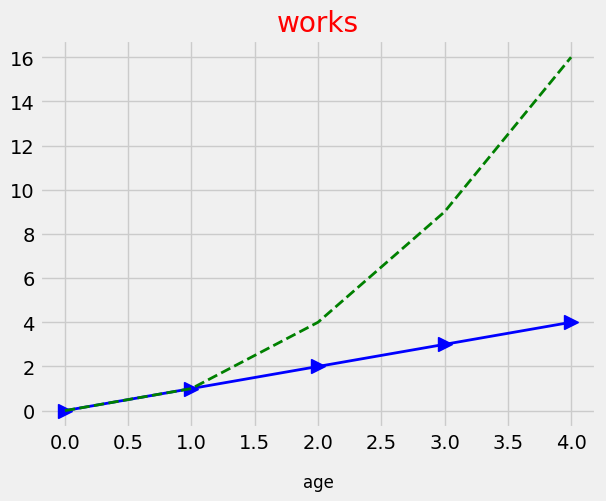

In [130]:
plt.figure()
plt.plot(nums, nums, color='blue', marker='>', markersize=10, linewidth=2)
plt.plot(nums, nums**2, color='green', linewidth=2, linestyle='dashed')
plt.title('works', color='red')
plt.xlabel('age', labelpad=15, fontsize=12)

In [131]:
plt.style.use('dark_background')

(1.0, 6.0)

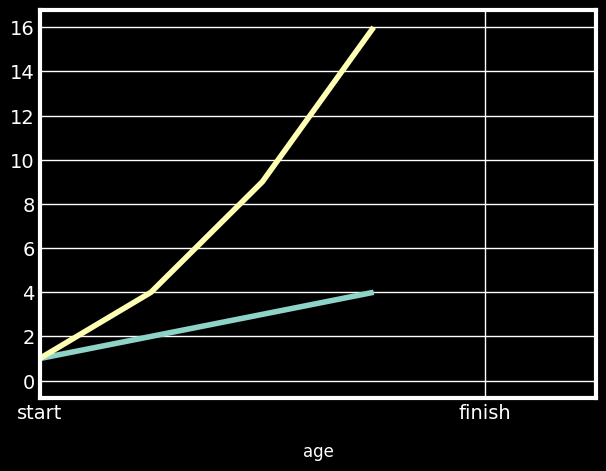

In [132]:
plt.figure()
plt.plot(nums, nums)
plt.plot(nums, nums**2)
plt.xlabel('age', labelpad=15, fontsize=12)
plt.xticks([1,5], labels=['start', 'finish'])
plt.xlim(1,6)

(1.0, 6.0)

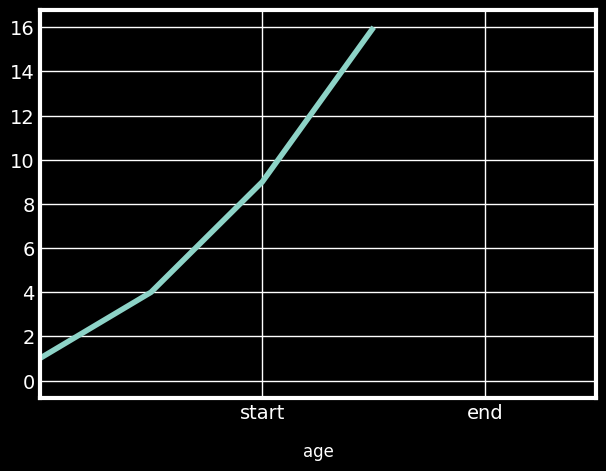

In [134]:
plt.figure()
plt.plot(nums, nums**2)
plt.xlabel('age', labelpad=15, fontsize=12)
plt.xticks([3, 5], labels=['start', 'end'])
plt.xlim(1,6)

In [135]:
plt.style.use('Solarize_Light2')

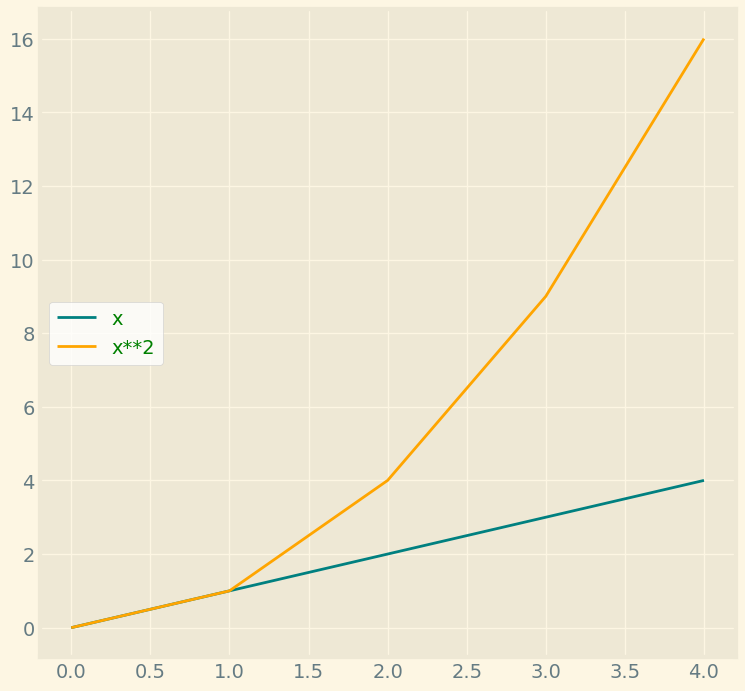

In [136]:
plt.figure(figsize=(8,8))
plt.plot(nums, color='teal', label='x')
plt.plot(nums**2, color='orange', label='x**2')
plt.legend(loc='center left', facecolor='white', labelcolor='green')

In [39]:
plants = ['Spinach', 'Turnip', 'Brocololi', 'Kale']
died = [10, 25, 5, 30]
germinated = [12, 50, 44, 82]

In [40]:
plt.legend?

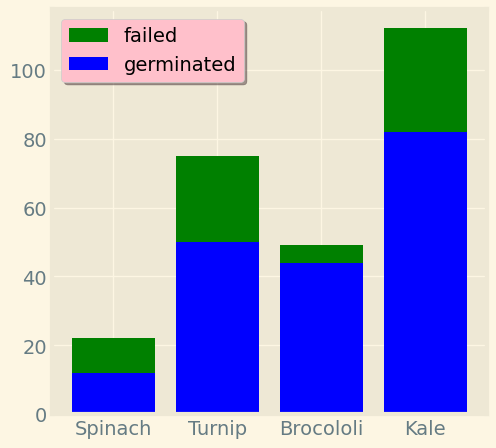

In [41]:
plt.figure(figsize=(5,5))
plt.bar(plants, died, bottom=germinated, color='green', label='failed')
plt.bar(plants, germinated, color='blue', label='germinated')
plt.legend(shadow=True, frameon=True, facecolor='pink', labelcolor='black')

## Histograms

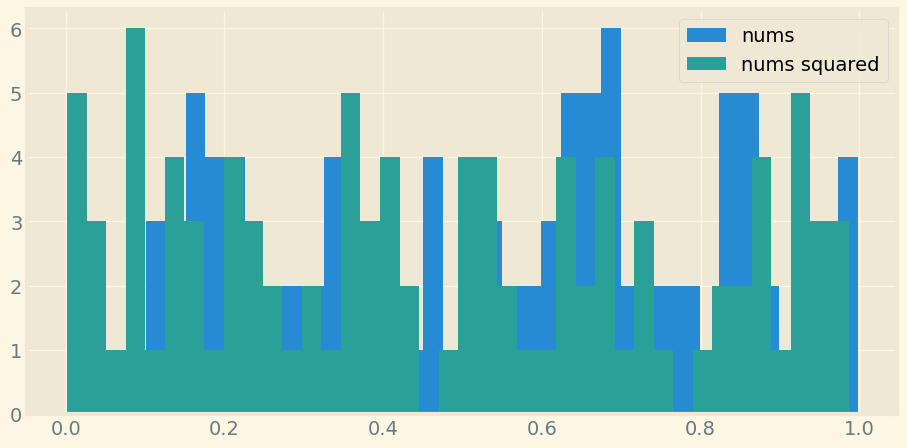

In [42]:
nums = np.random.rand(100)
nums2 = np.random.rand(100)
plt.figure(figsize=(10,5)) # width X height
plt.hist(nums, bins=40, label='nums')
plt.hist(nums2, bins=40, label='nums squared')
plt.legend(labelcolor='black')

## Scatter plot 

Text(0, 0.5, 'Popularity (Stream Count)')

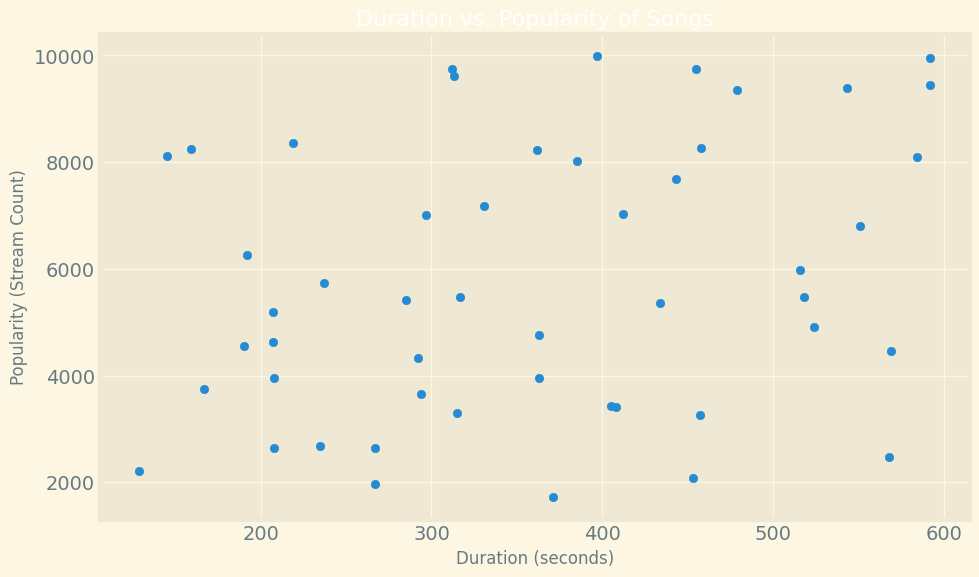

In [43]:
np.random.seed(0)
duration = np.random.randint(120, 600, 50)  # duration ranging from 2 to 10 minutes
popularity = np.random.randint(1000, 10000, 50)  # popularity score (stream count) ranging from 1000 to 10000

plt.figure(figsize=(10, 6))
plt.scatter(duration, popularity)
plt.title('Duration vs. Popularity of Songs')
plt.xlabel('Duration (seconds)')
plt.ylabel('Popularity (Stream Count)')

Text(0, 0.5, 'Popularity (Stream Count)')

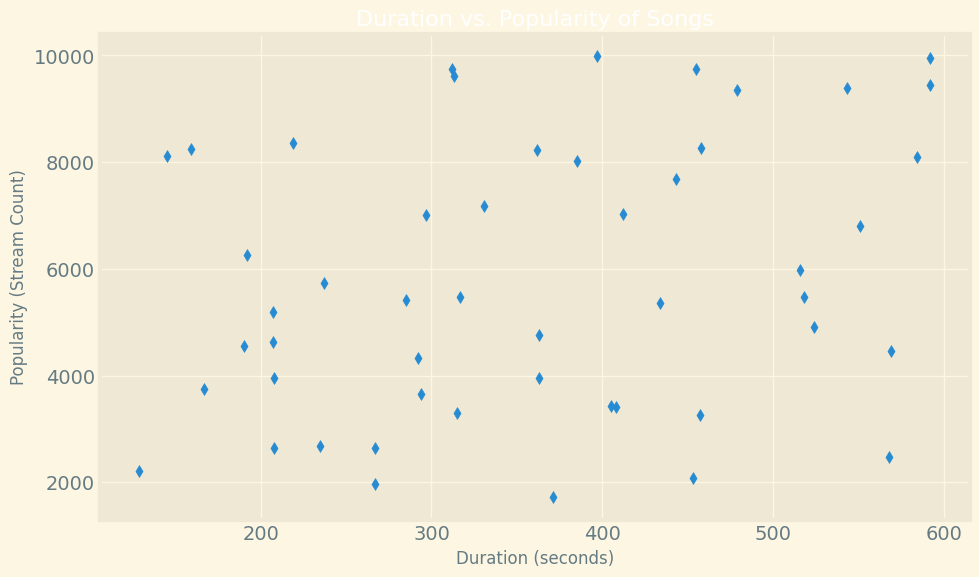

In [44]:
np.random.seed(0)
duration = np.random.randint(120, 600, 50)
popularity = np.random.randint(1000, 10000, 50)  

plt.figure(figsize=(10, 6))
plt.scatter(duration, popularity, marker='d')
plt.title('Duration vs. Popularity of Songs')
plt.xlabel('Duration (seconds)')
plt.ylabel('Popularity (Stream Count)')

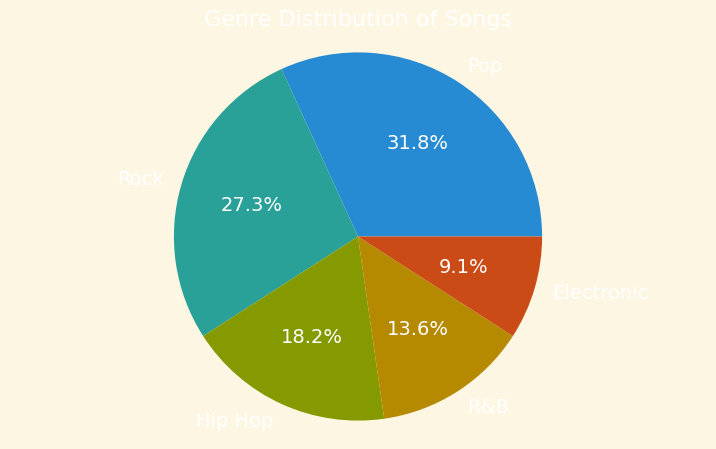

In [139]:
genres = ['Pop', 'Rock', 'Hip Hop', 'R&B', 'Electronic']
song_counts = [350, 300, 200, 150, 100]

plt.figure(figsize=(8, 5))
plt.pie(song_counts, labels=genres, autopct='%1.1f%%') # 1 digit after the decimal point.
plt.title('Genre Distribution of Songs')
plt.axis('equal')
plt.show()

### Exercise 2

Plot two different data points (two lists) on the same plot (the graph should have a list for the y axis and two lists for the x axis). Make sure to:
1. pick the graph size you want
2. Add a title
3. Add an x label
4. Add a y label
5. Add a legend
6. Use the marker of choice (if the graph you used supports a marker)

## Subplots

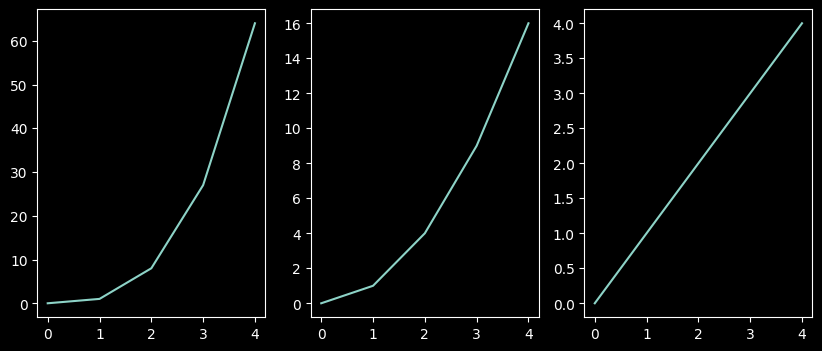

In [59]:
nums = np.arange(5)
plt.figure(figsize=(10,4))
plt.subplot(1,3,3)
plt.plot(nums)
plt.subplot(1,3,2)
plt.plot(nums**2)
plt.subplot(1,3,1)
plt.plot(nums**3)

Text(0.5, 1.0, 'sqrt')

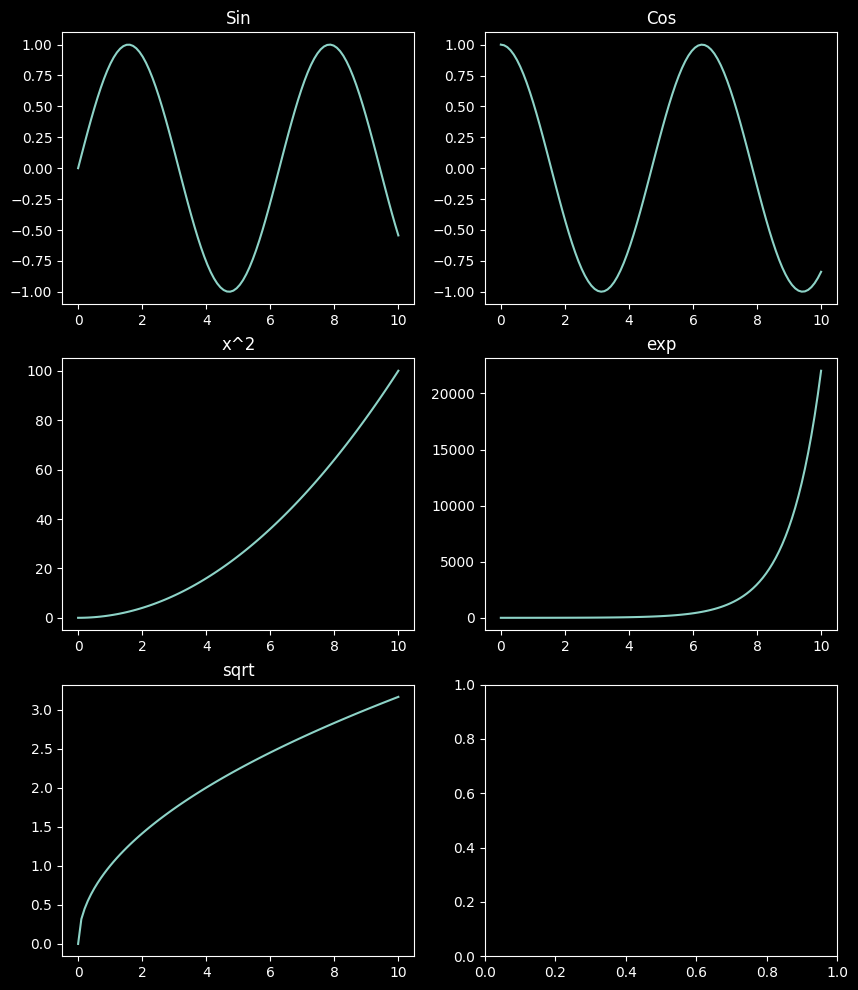

In [60]:
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = x**2
y4 = np.exp(x)
y5 = np.sqrt(x)

fig, ((ax1, ax2), (ax3, ax4), (ax5, _)) = plt.subplots(3, 2, figsize=(10, 12))

ax1.plot(x, y1)
ax1.set_title('Sin')
ax2.plot(x, y2)
ax2.set_title('Cos')
ax3.plot(x, y3)
ax3.set_title('x^2')
ax4.plot(x, y4)
ax4.set_title('exp')
ax5.plot(x, y5)
ax5.set_title('sqrt')

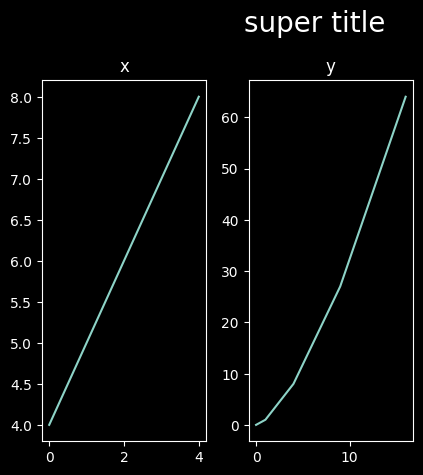

In [63]:
plt.suptitle('super title', fontsize=20)
plt.subplot(1,3,1)
plt.title('x')
plt.plot(nums, nums+4)

plt.subplot(1,3,2)
plt.title('y')
plt.plot(nums**2, nums**3)

plt.tight_layout()

### Exercise 3 

Create at least 3 subplots in what ever method you see fit (we've seen 2).

Use one extra parameter from matplotlib documentation

# Seaborn

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [3]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [6]:
sns.set_theme()

<Axes: xlabel='total_bill', ylabel='tip'>

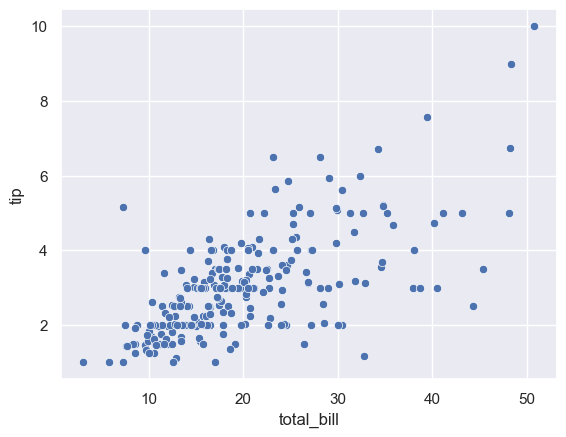

In [7]:
sns.scatterplot(data=tips, x='total_bill', y='tip')

<Axes: xlabel='total_bill', ylabel='tip'>

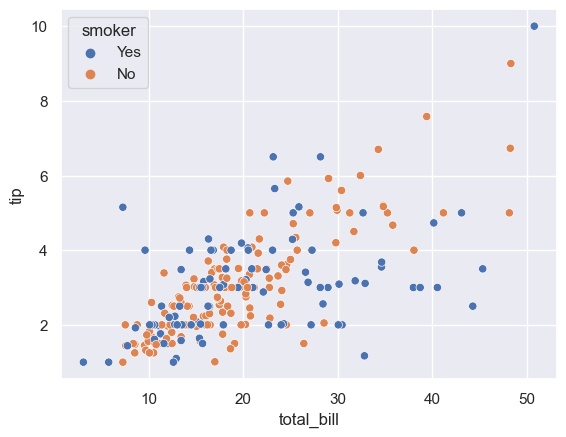

In [8]:
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='smoker')

<Axes: xlabel='total_bill', ylabel='tip'>

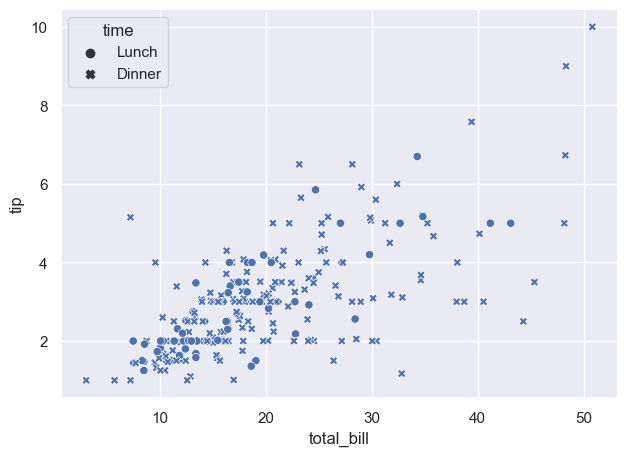

In [54]:
sns.scatterplot(data=tips, x='total_bill', y='tip', style='time')

<Axes: xlabel='total_bill', ylabel='tip'>

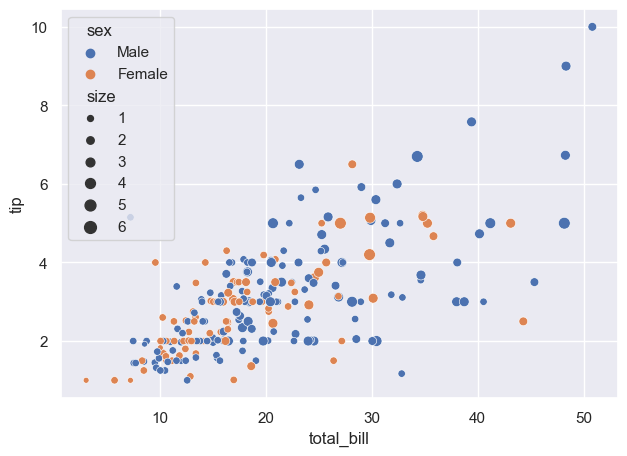

In [55]:
sns.scatterplot(data=tips, x='total_bill', y='tip', size='size', hue='sex')

## Line Plots

In [9]:
sns.get_dataset_names()

In [57]:
flights = sns.load_dataset('flights')

In [58]:
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


<Axes: xlabel='year', ylabel='passengers'>

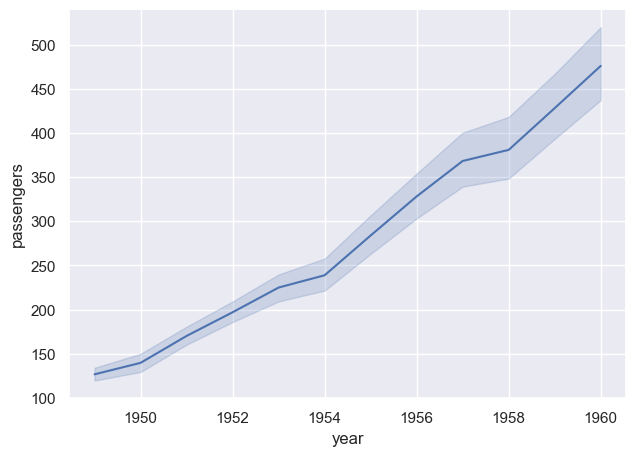

In [59]:
sns.lineplot(data=flights, x='year', y='passengers') # takes the mean by default

<Axes: xlabel='year', ylabel='passengers'>

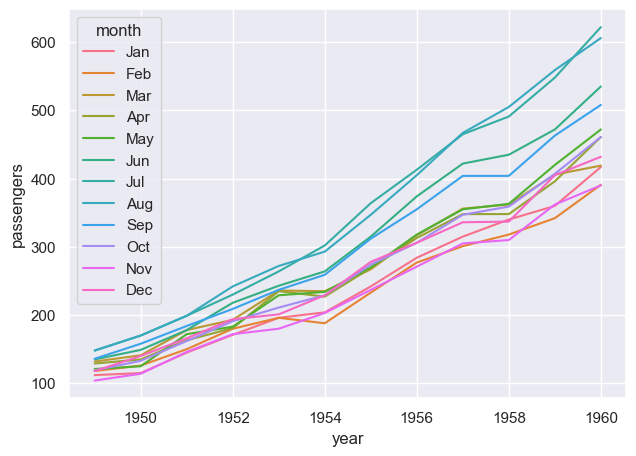

In [60]:
sns.lineplot(data=flights, x='year', y='passengers', estimator='sum', hue='month')

## sns Grid

In [12]:
taxis = sns.load_dataset('taxis')

<Axes: xlabel='pickup_borough', ylabel='fare'>

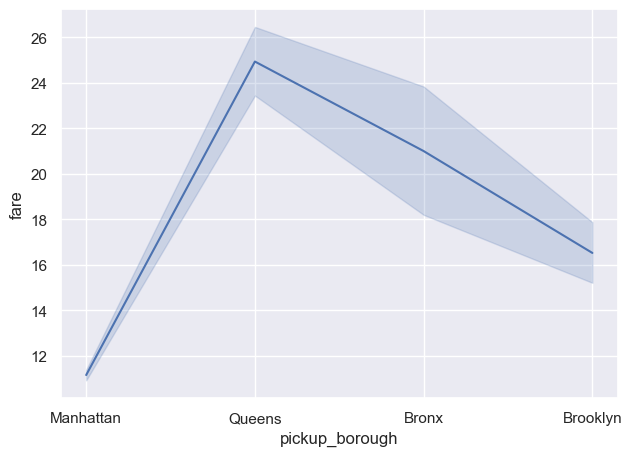

In [63]:
sns.lineplot(data=taxis, x='pickup_borough', y='fare', estimator='mean')

<Axes: xlabel='pickup_borough', ylabel='fare'>

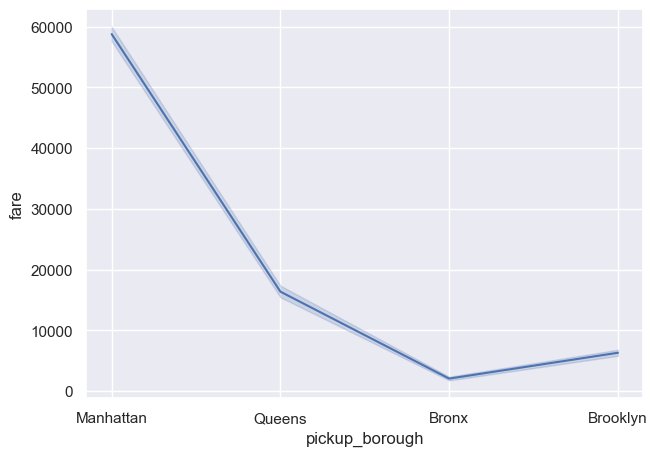

In [64]:
sns.lineplot(data=taxis, x='pickup_borough', y='fare', estimator='sum')

In [77]:
len(taxis[taxis['pickup_borough'] == 'Manhattan']) / len(taxis)

0.818902533810042

In [66]:
taxis

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


In [10]:
sns.relplot?

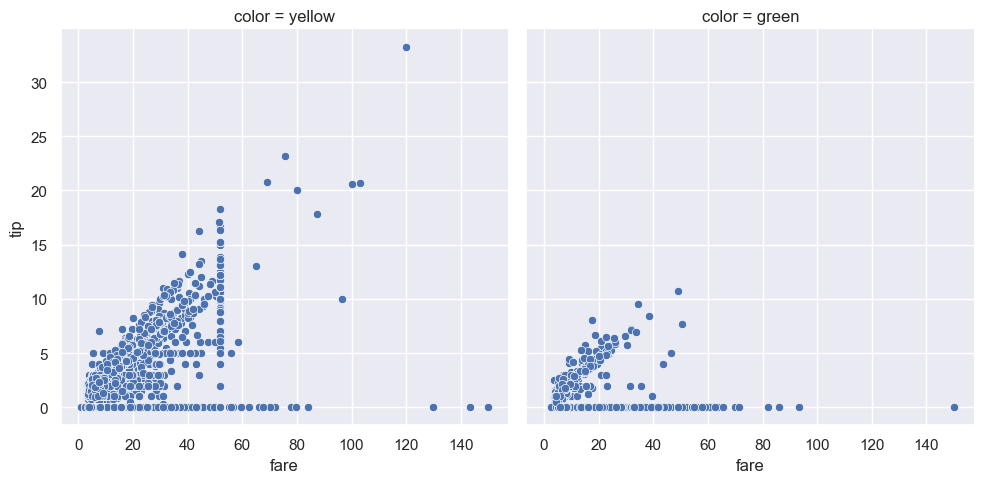

In [67]:
sns.relplot(data=taxis, x='fare', y='tip', col='color')

In [68]:
taxis['color'].value_counts()

color
yellow    5451
green      982
Name: count, dtype: int64

In [69]:
taxis[taxis['color'] == 'yellow']['tip'].mean()

2.1924747752705924

In [70]:
taxis[taxis['color'] == 'green']['tip'].mean()

0.7954582484725051

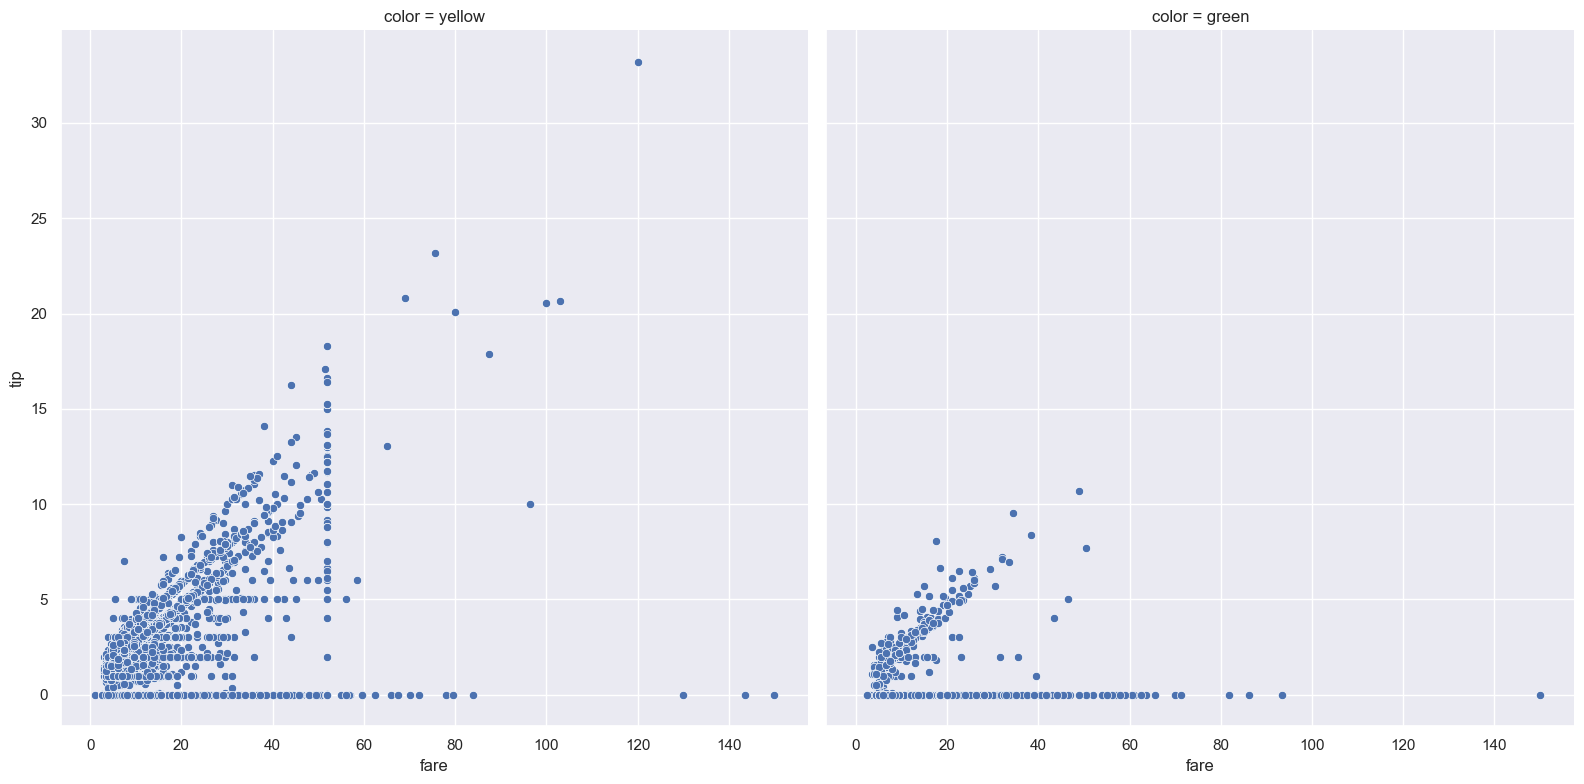

In [71]:
sns.relplot(data=taxis, x='fare', y='tip', col='color', height=8, aspect=1)

## Exercise 4

Choose one of the datasets provided by sns. Choose data that fits a lineplot (classic would be a time based value such as flights during different months). Plot 3 different dimensios of the data. Make sure to use a reasonable estimator.

Use one extra parameter from sns documentation

## Histograms

Histograms are great for understanding one specific feature. How it appears, how it behaves.

In [72]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<Axes: xlabel='tip', ylabel='Count'>

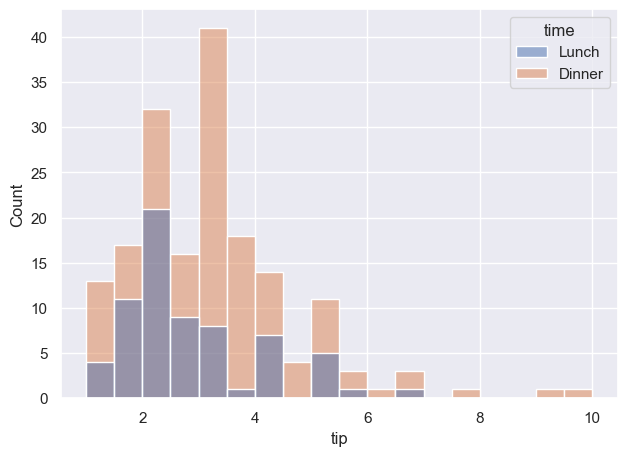

In [73]:
sns.histplot(data=tips, x='tip', hue='time')

<Axes: xlabel='total_bill', ylabel='Count'>

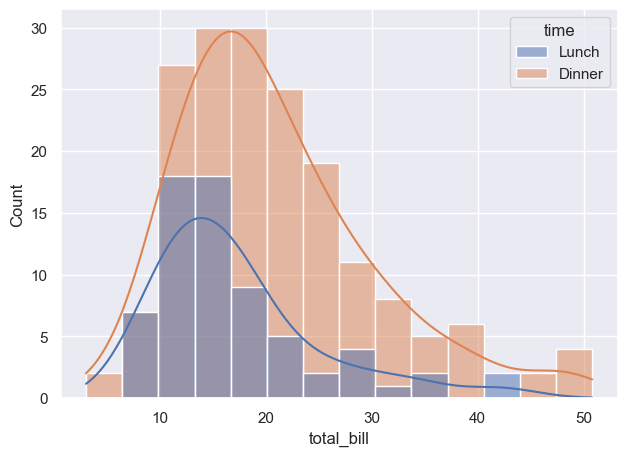

In [74]:
sns.histplot(data=tips, x='total_bill', hue='time', kde=True)

In [75]:
tips[tips['time'] == 'Lunch']['total_bill'].sum()

1167.47

In [76]:
tips[tips['time'] == 'Dinner']['total_bill'].sum()

3660.3

## Exercise 5

Choose one of the datasets provided by sns. Choose data that fits a histogram (describe one feature). Plot 3 different dimensios of the data. Make sure to use a reasonable estimator. Does using the kde help you visualize stuff?

Use one extra parameter from sns documentation